<span style="font-size:30px">**Filtros de dominio espacial, parte 3: Filtro laplaciano.**</span> 
    
<span style="font-family: 'Verdana'; color: red;"> *Bronquivoide* </span>

# Antecedentes:

### Un modelo para operar imágenes es el de segmentación. La segmentación consiste en una partición de una imagen en un conjunto finito de regiones homogéneas únicas (por ello se les identifica mediante etiquetas únicas), conectadas y que no se superponen. Los pixeles que viven en cada una de estas regiones, poseen propiedades idénticas (contraste, escala de grises, etc).

### Si $R$ representa una image, una segmentación completa de $R$ corresponde a un conjunto finito de regiones identificadas, $\{R_1, \dots R_N\}$, con $R_k \subset R$, tal que:

<font size="5"> $ R= \bigcup_{k=1}^N R_k$</font> 

###        y

<font size="5"> $R_i \bigcap R_j = \Phi, \forall i\neq j$</font>

### Con base a lo anterior, vamos a tener sistemas que nos van a dar información sobre las regiones, los bordes y las líneas, los cuales son detectados por un cambio abrupto en la magnitud de intensidad de la escala de gris.

### Un borde es la frontera entre dos diferentes regiones, el sistema que las divide. Mientras que una línea es un sistema incorporado en cada región.

### Al proceso de destacar transiciones en los valores de intensidad asociados a una imagen con base a los bordes, se le conoce como *sharpening* (afilado, realzamiento o agudización de una imagen).

# Fundamentos del filtro laplaciano:

### La detección de bordes en una imagen es una operación que, digamos, antecede al sharpening, pues la detección de bordes trabaja los cambios locales significantes en los niveles de intensidad de una imagen, y el sharpening mejora la calidad, en cuanto a claridad, de esos bordes.

### En la detección de bordes se miden los cambios en los niveles de intensidad por medio del operador gradiente sobre una imagen $f(x,y)$, pues en general, el operador que cuantifica cambios de cantidades en términos espaciales es el gradiente:

<font size="5"> $ \nabla f(x,y)= \vec{G}=\begin{pmatrix}
G_x \\
G_y
\end{pmatrix}=\begin{pmatrix}
\frac{\partial f(x,y)}{\partial x} \\
\frac{\partial f(x,y)}{\partial y}
\end{pmatrix}$</font> 

### En el caso del procesamiento de imagen donde abordamos analíticamente una imagen arbitraria mediante una función bidimensional, las componentes del gradiente se aproximan mediante las siguientes ecuaciones:

<font size="5"> $G_x = f(x+1,y)-f(x,y)=\frac{\partial f(x,y)}{\partial x}$</font>

<font size="5"> $G_y = f(x,y+1)-f(x,y)=\frac{\partial f(x,y)}{\partial y}$</font>

### Y en cuanto a su segunda derivada parcial:

<font size="5"> $\frac{\partial ^2 f(x,y)}{\partial x^2} = f(x+1,y)-2f(x,y)+f(x-1,y)$</font>

<font size="5"> $\frac{\partial ^2 f(x,y)}{\partial y^2} = f(x,y+1)-2f(x,y)+f(x,y-1)$</font>

### Por lo que retomando la definición del operador laplaciano, para una imagen arbitraria $f(x,y)$ tenemos que:

<font size="5"> $\nabla ^2 f(x,y):=\frac{\partial ^2 f(x,y)}{\partial x^2} + \frac{\partial ^2 f(x,y)}{\partial y^2} = f(x+1,y)+f(x-1,y)-4f(x,y)+f(x,y+1)+f(x,y-1)$</font>

# Introducción:

### Ahora en esta tercera parte de filtros espaciales, vamos a tomar como punto de partida las ecuaciones para describir la imagen corrompida $g(x,y)$ que habíamos visto para los filtros gaussiano y de mediana, y vamos a extenderlas para el caso del filtro laplaciano.

### Los filtros que corresponden al proceso de detección de bordes y afilamiento son los filtros pasa altas, en donde uno de los que comunmente se usa es el filtro laplaciano. La forma básica de usar el laplaciano de una imagen para el afilado es con base a la siguiente ecuación para la imagen degradada:

### <font size="5"> $ g(x,y)=f(x,y)+c \cdot \nabla ^2 f(x,y)$</font>, en donde $c$ es una constante. Comunmente $c=\pm 1$.

### Por lo que la imagen de salida al aplicar el filtro laplaciano a la imagen corrompida es bajo el operador de convolución:

<font size="5"> $\hat{f}(x,y)=T[g(x,y)]=L(x,y) \diamond g(x,y)$</font>

### $L(x,y)$ representa un kernel laplaciano. Los típicos kernels para el filtro laplaciano son los siguientes:

### $\blacksquare$ Si $c=-1$:

 <font size="5"> $
L(x,y)=\begin{pmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{pmatrix}
$, o bien, $\begin{pmatrix}
1 & 1 & 1 \\
1 & -8 & 1 \\
1 & 1 & 1
\end{pmatrix}$</font> 

### $\blacksquare$ Si $c=1$:

<font size="5"> $L(x,y)=\begin{pmatrix}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0
\end{pmatrix}
$, o bien, $\begin{pmatrix}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1
\end{pmatrix}$</font> 

### Nótese que estos kernels son de orden $3\times 3$ y consisten en un pixel en el centro de una vecindad que es el conjunto de sus ocho vecinos inmediatos, dos verticales, dos horizontales y cuatro diagonales, $N_8 (p)$.

# Ejercicio:

### Implementar con OpenCV un filtro laplaciano a las imágenes *Lena.tif* y *tablero.png*. Vamos a hacerlo mediante los kernels:

<font size="5"> $
L_1 (x,y)=\begin{pmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{pmatrix}
$ </font> 

### Y

<font size="5"> $L_2 (x,y)=\begin{pmatrix}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0
\end{pmatrix}
$</font> 

### El procedimiento se hará con la función *cv2.Laplacian*, la cual puede recibir varios argumentos, entre los más importantes están:

### 1) Una imagen para procesar.

### 2) Una profundidad.

### 3) Un tamaño de kernel.

### 4) Un tipo de borde para los límites de la imagen.



# $\blacksquare$ Lena.tif:

El primer kernel es:
 [[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]


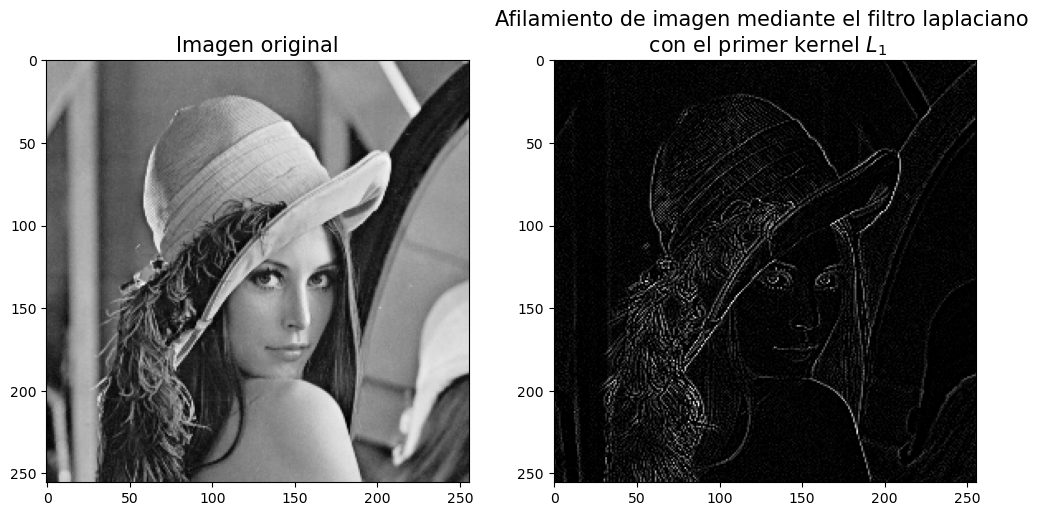

El segundo kernel es:
 [[ 0. -1.  0.]
 [-1.  4. -1.]
 [ 0. -1.  0.]]


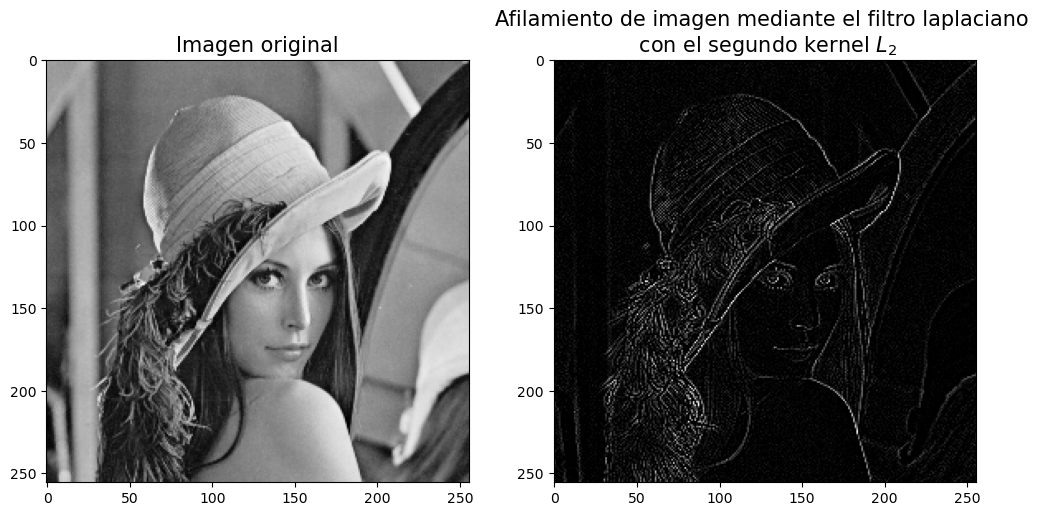

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Generar el primer kernel:
kernel_laplaciano1=np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype = np.float32)
print(f"El primer kernel es:\n {kernel_laplaciano1}")

#Aplicación del filtro laplaciano en términos del primer kernel:
laplaciano1=cv2.Laplacian(imagen_original, -1, kernel_laplaciano1)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(imagen_original, cmap = 'gray')
plt.title("Imagen original", fontsize = 15)
plt.subplot(1,2,2)
plt.imshow(laplaciano1, cmap = 'gray')
plt.title("Afilamiento de imagen mediante el filtro laplaciano \n con el primer kernel $L_1$", fontsize = 15)
plt.show()

#Generar el segundo kernel:
kernel_laplaciano2=np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype = np.float32)
print(f"El segundo kernel es:\n {kernel_laplaciano2}")

#Aplicación del filtro laplaciano en términos del segundo kernel:
laplaciano2=cv2.Laplacian(imagen_original, -1, kernel_laplaciano2)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(imagen_original, cmap = 'gray')
plt.title("Imagen original", fontsize = 15)
plt.subplot(1,2,2)
plt.imshow(laplaciano2, cmap = 'gray')
plt.title("Afilamiento de imagen mediante el filtro laplaciano \n con el segundo kernel $L_2$", fontsize = 15)
plt.show()

# O aplicando un kernel de tamaño 5 ($5\times 5$), es decir, establecemos el argumento *ksize=5*, el cual genera por defecto el siguiente kernel:

<font size="5"> $
L=\begin{pmatrix}
0 & 1 & 1 & 1 & 0 \\
1 & 1 & 2 & 1 & 1 \\
1 & 2 & -16 & 2 & 1 \\
1 & 1 & 2 & 1 & 1 \\
0 & 1 & 1 & 1 & 0
\end{pmatrix}
$ </font> 

# Este proceso resaltará más los bordes.

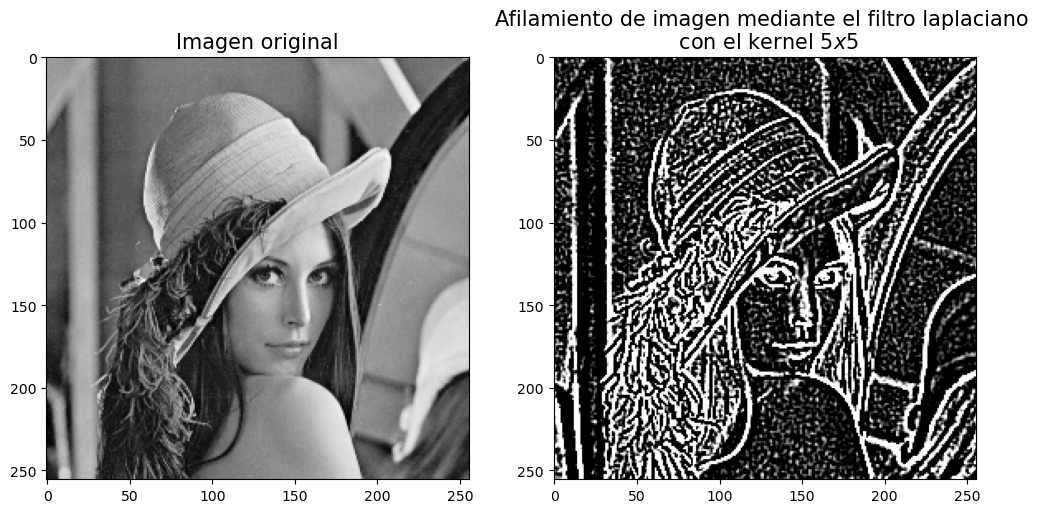

In [29]:
laplaciano3 = cv2.Laplacian(imagen_original, -1, ksize = 5)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(imagen_original, cmap = 'gray')
plt.title("Imagen original", fontsize = 15)
plt.subplot(1,2,2)
plt.imshow(laplaciano3, cmap = 'gray')
plt.title("Afilamiento de imagen mediante el filtro laplaciano \n con el kernel $5x5$", fontsize = 15)
plt.show()

# $\blacksquare$ tablero.png:

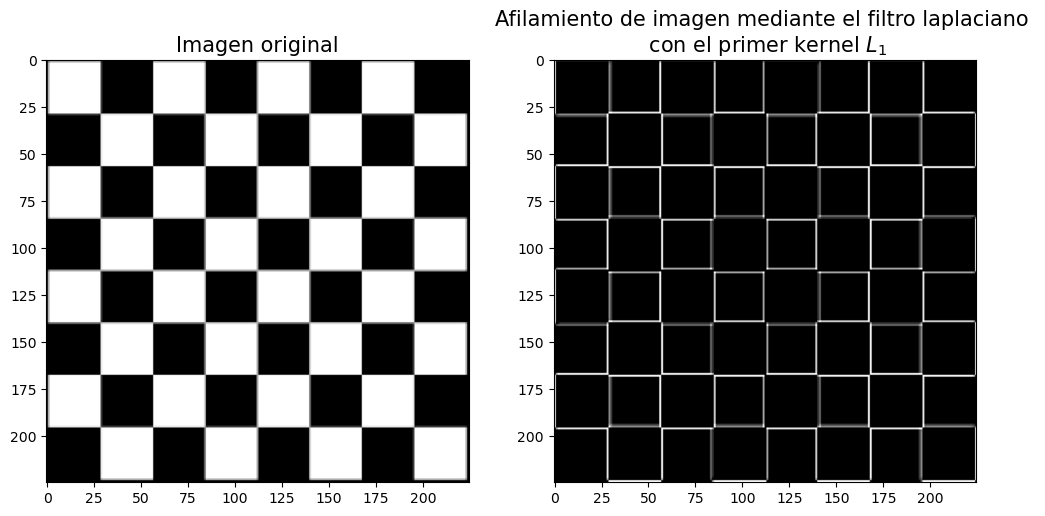

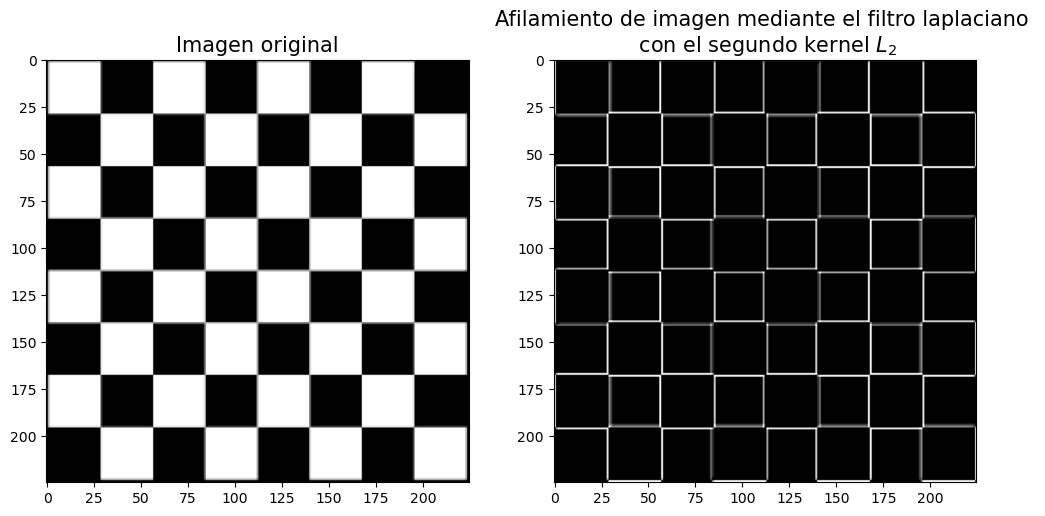

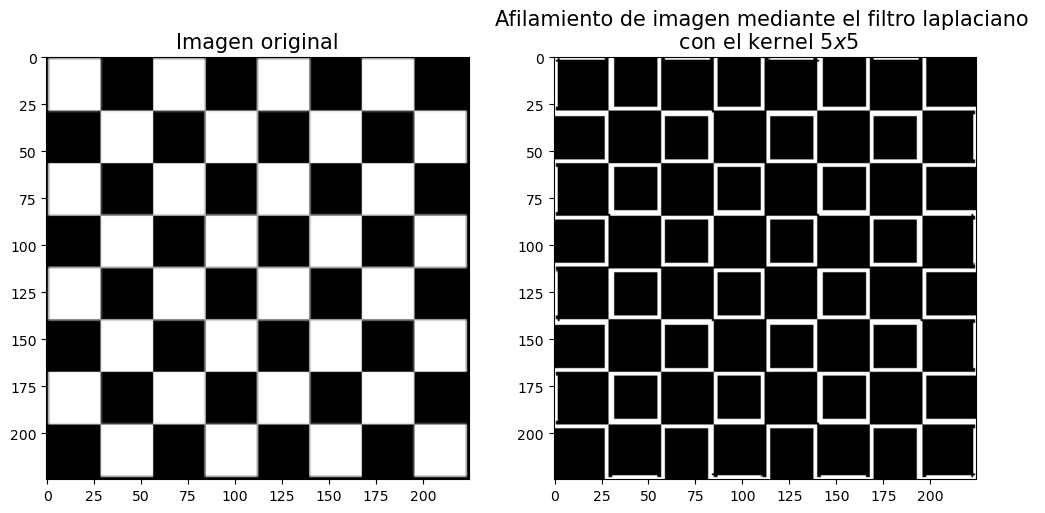

In [34]:
#Lectura de tablero.png:
imagen_original_2= cv2.imread("tablero.png", 0)

#Aplicación del filtro laplaciano en términos del primer kernel:
laplaciano_tablero_1=cv2.Laplacian(imagen_original_2, -1, kernel_laplaciano1)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(imagen_original_2, cmap = 'gray')
plt.title("Imagen original", fontsize = 15)
plt.subplot(1,2,2)
plt.imshow(laplaciano_tablero_1, cmap = 'gray')
plt.title("Afilamiento de imagen mediante el filtro laplaciano \n con el primer kernel $L_1$", fontsize = 15)
plt.show()

#Aplicación del filtro laplaciano en términos del segundo kernel:
laplaciano_tablero_2=cv2.Laplacian(imagen_original_2, -1, kernel_laplaciano2)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(imagen_original_2, cmap = 'gray')
plt.title("Imagen original", fontsize = 15)
plt.subplot(1,2,2)
plt.imshow(laplaciano_tablero_2, cmap = 'gray')
plt.title("Afilamiento de imagen mediante el filtro laplaciano \n con el segundo kernel $L_2$", fontsize = 15)
plt.show()

#Aplicación del filtro laplaciano en términos del kernel 5x5:
laplaciano_tablero_3 = cv2.Laplacian(imagen_original_2, -1, ksize = 5)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(imagen_original_2, cmap = 'gray')
plt.title("Imagen original", fontsize = 15)
plt.subplot(1,2,2)
plt.imshow(laplaciano_tablero_3, cmap = 'gray')
plt.title("Afilamiento de imagen mediante el filtro laplaciano \n con el kernel $5x5$", fontsize = 15)
plt.show()

# Fin del ejercicio:
### Bibliografía recomendada:

### $\blacksquare$ Acharya, T., & Ray, A. K. (2005). Image processing: Principles and applications. Wiley-Interscience.

### $\blacksquare$ Gonzalez, R. C., & Woods, R. E. (2008). Digital image processing (3rd ed.). Pearson.